In [357]:
import numpy as np
import pandas 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

- Load the train and test of the titanic data at one dataframe

In [358]:
titanic_train = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic_test=pd.read_csv("/kaggle/input/titanic/test.csv")
titanic_Data= pd.concat([titanic_train, titanic_test], ignore_index=False)

In [359]:
rows,columns=titanic_Data.shape
print("num of rows in data :",rows)
print("the number of column in the data:",columns)

num of rows in data : 1309

the number of column in the data: 12


In [360]:
titanic_Data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [361]:
titanic_Data.info()

<class 'pandas.core.frame.DataFrame'>

Index: 1309 entries, 0 to 417

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  1309 non-null   int64  

 1   Survived     891 non-null    float64

 2   Pclass       1309 non-null   int64  

 3   Name         1309 non-null   object 

 4   Sex          1309 non-null   object 

 5   Age          1046 non-null   float64

 6   SibSp        1309 non-null   int64  

 7   Parch        1309 non-null   int64  

 8   Ticket       1309 non-null   object 

 9   Fare         1308 non-null   float64

 10  Cabin        295 non-null    object 

 11  Embarked     1307 non-null   object 

dtypes: float64(3), int64(4), object(5)

memory usage: 132.9+ KB


- Check the null values at the data:

In [362]:
titanic_Data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

- At the above cell we have null values in the Age columns and survived column , we can't drop it because it is important.
- At the column  Survived we have 418 passenger not know they are alive or died.
- At the column  Age we have 263 passenger not know the Age of them.
- we can ignor the another null values because they are not important and not affect in the data

In [363]:
#drop unneeded column:
titanic_Data.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
titanic_Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


- check the duplicated values , then remove them:

In [364]:
titanic_Data.duplicated().sum()

149

In [365]:
titanic_Data.drop_duplicates(inplace=True)

In [366]:
titanic_Data.duplicated().sum()

0

In [367]:
titanic_Data.info()

<class 'pandas.core.frame.DataFrame'>

Index: 1160 entries, 0 to 417

Data columns (total 8 columns):

 #   Column    Non-Null Count  Dtype  

---  ------    --------------  -----  

 0   Survived  780 non-null    float64

 1   Pclass    1160 non-null   int64  

 2   Sex       1160 non-null   object 

 3   Age       998 non-null    float64

 4   SibSp     1160 non-null   int64  

 5   Parch     1160 non-null   int64  

 6   Fare      1159 non-null   float64

 7   Embarked  1158 non-null   object 

dtypes: float64(3), int64(3), object(2)

memory usage: 81.6+ KB


In [368]:
rows , columns = titanic_Data.shape
print("num of rows in data :",rows)
print("the number of column in the data:",columns)

num of rows in data : 1160

the number of column in the data: 8


- compute the number of people survived or died
- the null values i will replace them with unknown , in this values i don't know the passengers are alive or died.

<Axes: xlabel='Survived'>

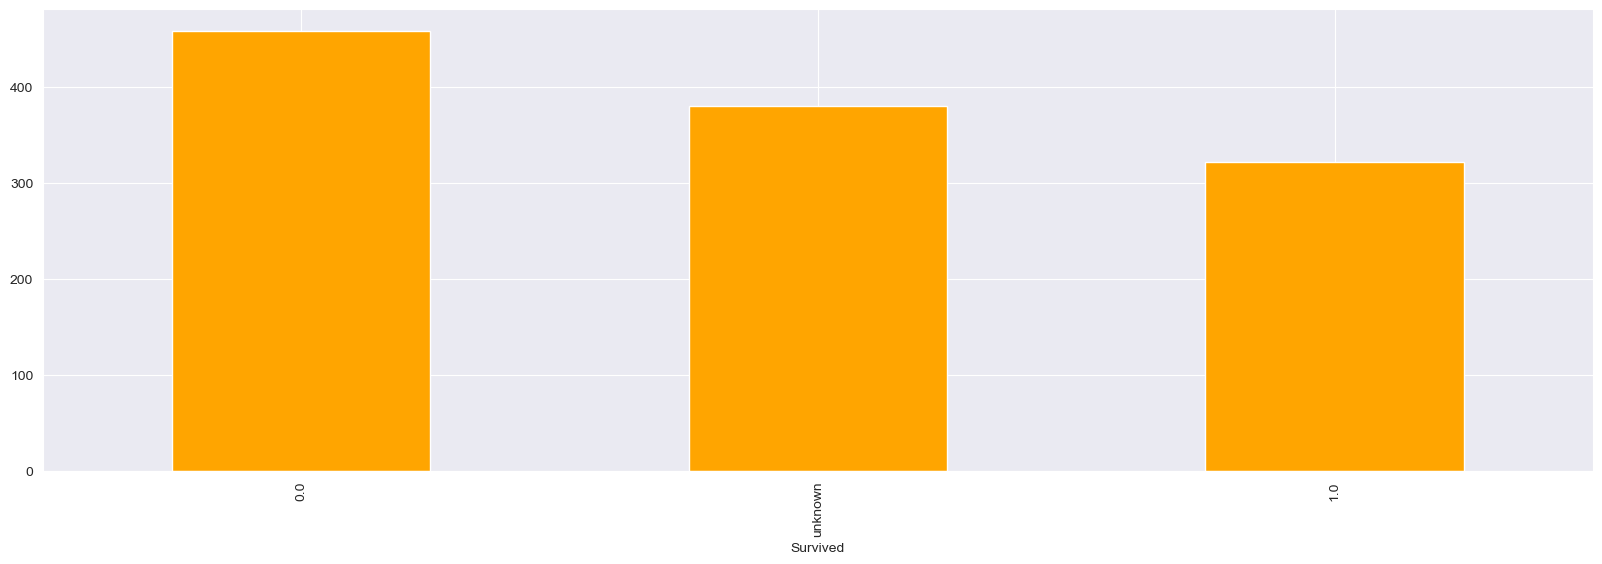

In [369]:
survive_people=titanic_Data['Survived'].value_counts(dropna=False)
survive_people.index = survive_people.index.where(~survive_people.index.isna(), 'unknown')
survive_people.plot(kind='bar',color='orange',figsize=(20,6))

- At the above plot number of passengers died above to 400 
- The number of passengers unknown died or survive  above to 300
- the number of passengers survived are less than 300

- we can now compute the number of passengers have ticket class in the data:

<Axes: xlabel='Pclass'>

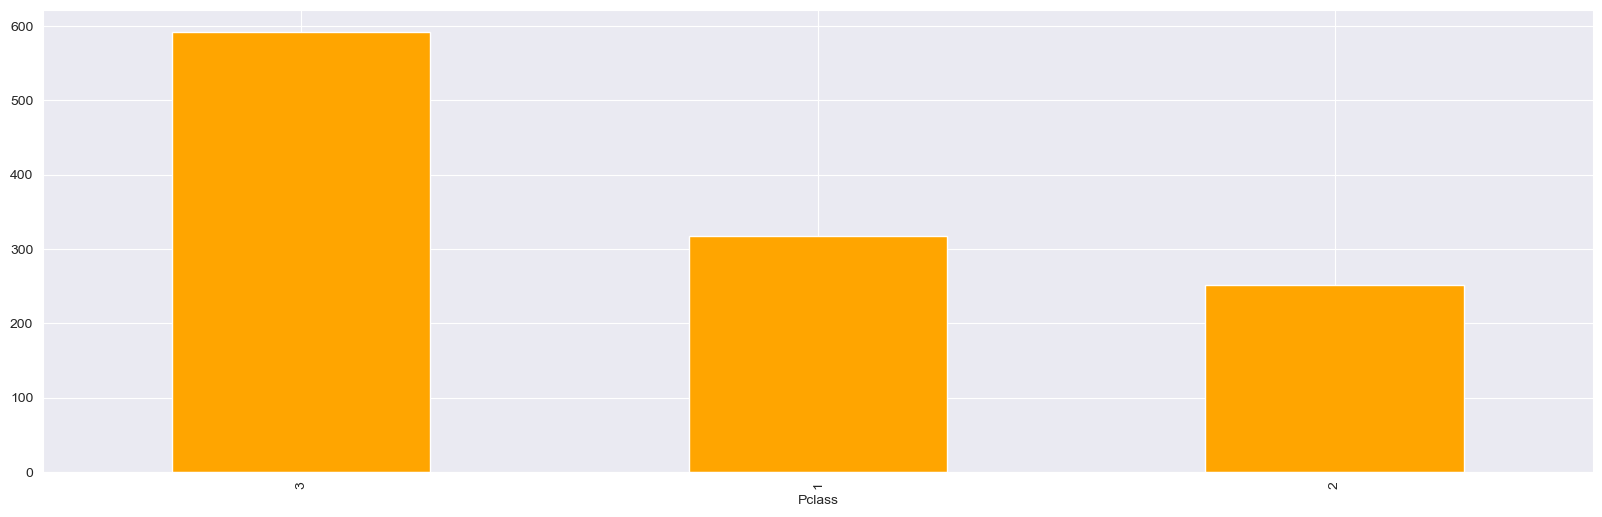

In [370]:
class_degree=titanic_Data['Pclass'].value_counts()
class_degree.plot(kind='bar',color='orange',figsize=(20,6))

- at the above plot above 500 passengers in the 3 degree of the data
- above 300 passengers in the  1 degree of the data  
- less than 300 passengers in the 2 degree of the data

<Axes: xlabel='Sex'>

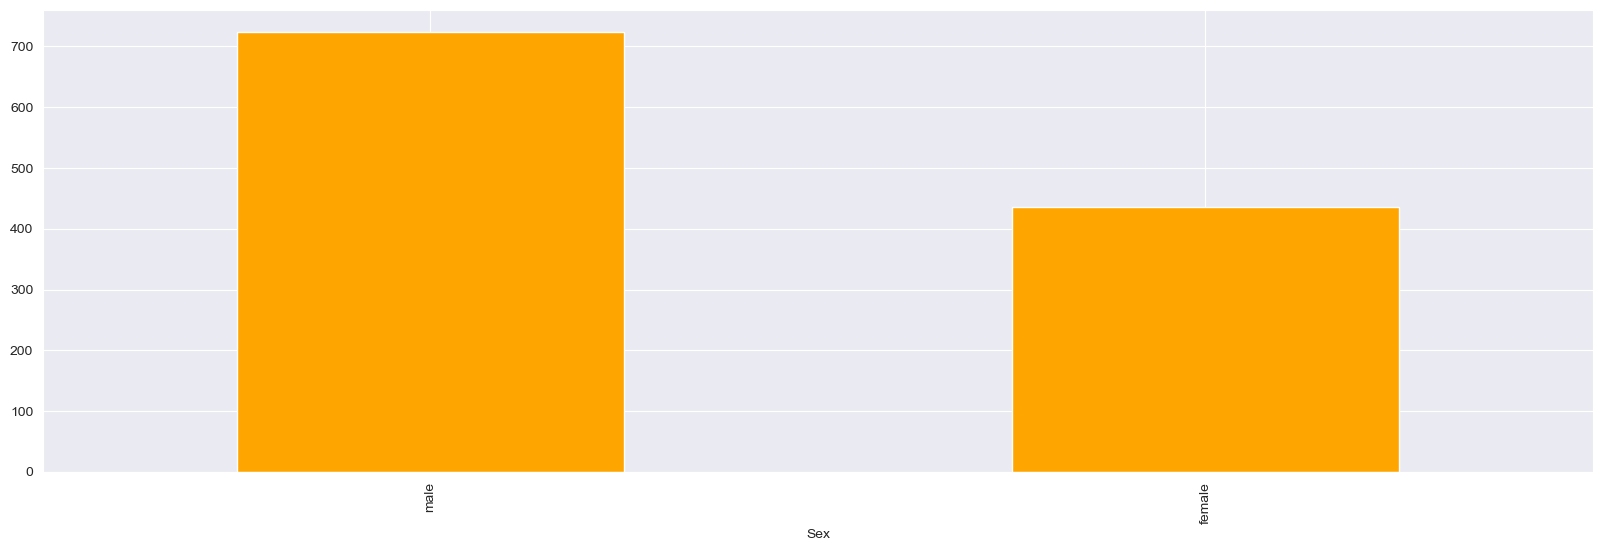

In [371]:
sex_num=titanic_Data['Sex'].value_counts()
sex_num.plot(kind='bar',color='orange',figsize=(20,6))

- At the above plot we can the number of males in the data are above to 700 passengers and the females are less the 450 passengers

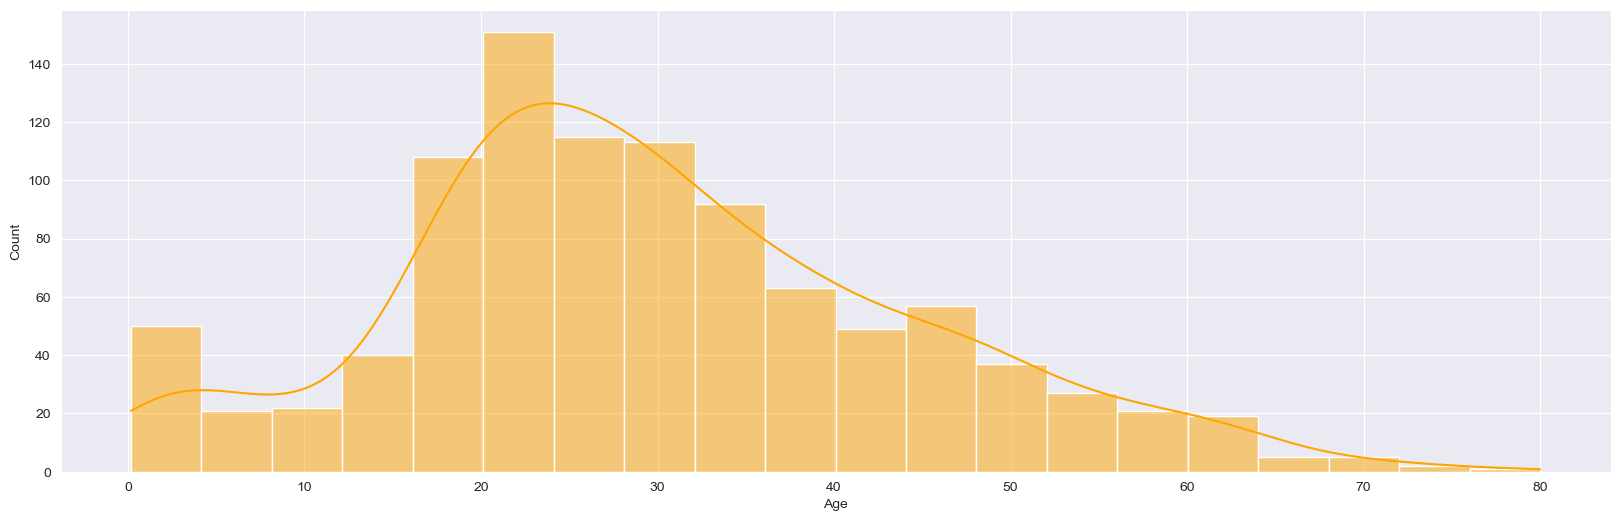

In [372]:
plt.figure(figsize=(20,6))
sns.histplot(titanic_Data['Age'], bins=20, kde=True, color='orange') 
plt.show()

- The ages in the data most of the passengers the range of ages of them between the 15 to 35

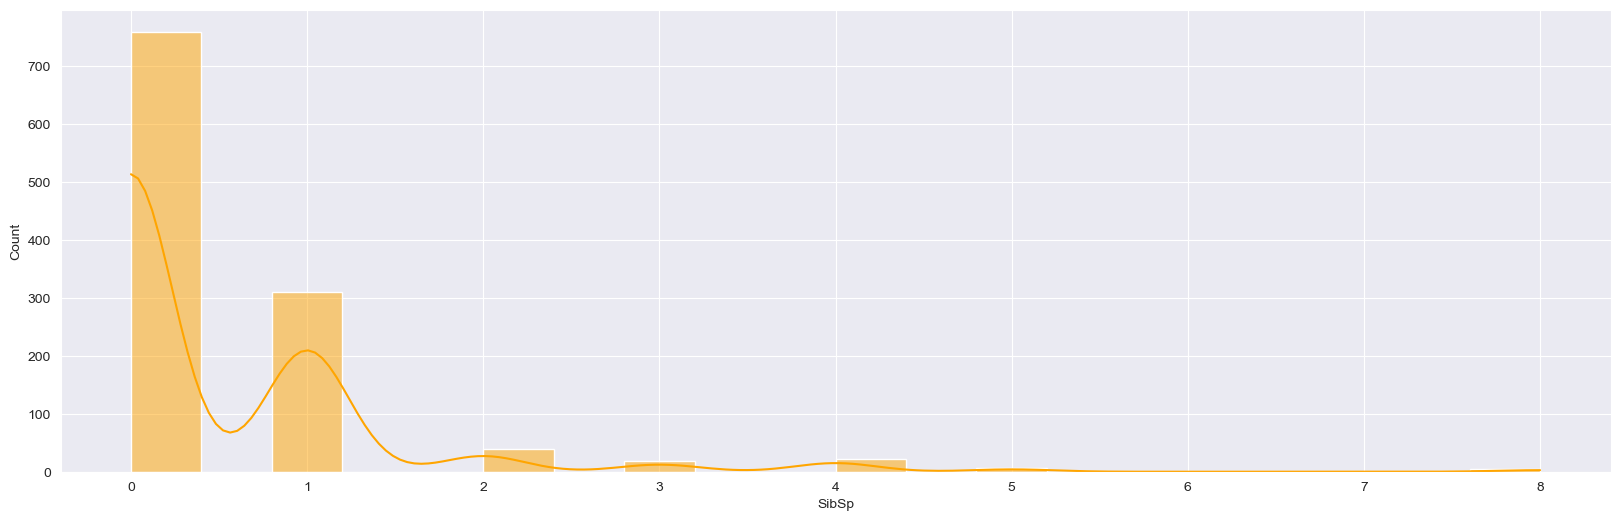

In [373]:
plt.figure(figsize=(20,6))
sns.histplot(titanic_Data['SibSp'], bins=20, kde=True, color='orange') 
plt.show()

- At the above plot more of 700 passengers not have siblings in the titanic
- Less than 400 passengers have 1 sibling in the titanic

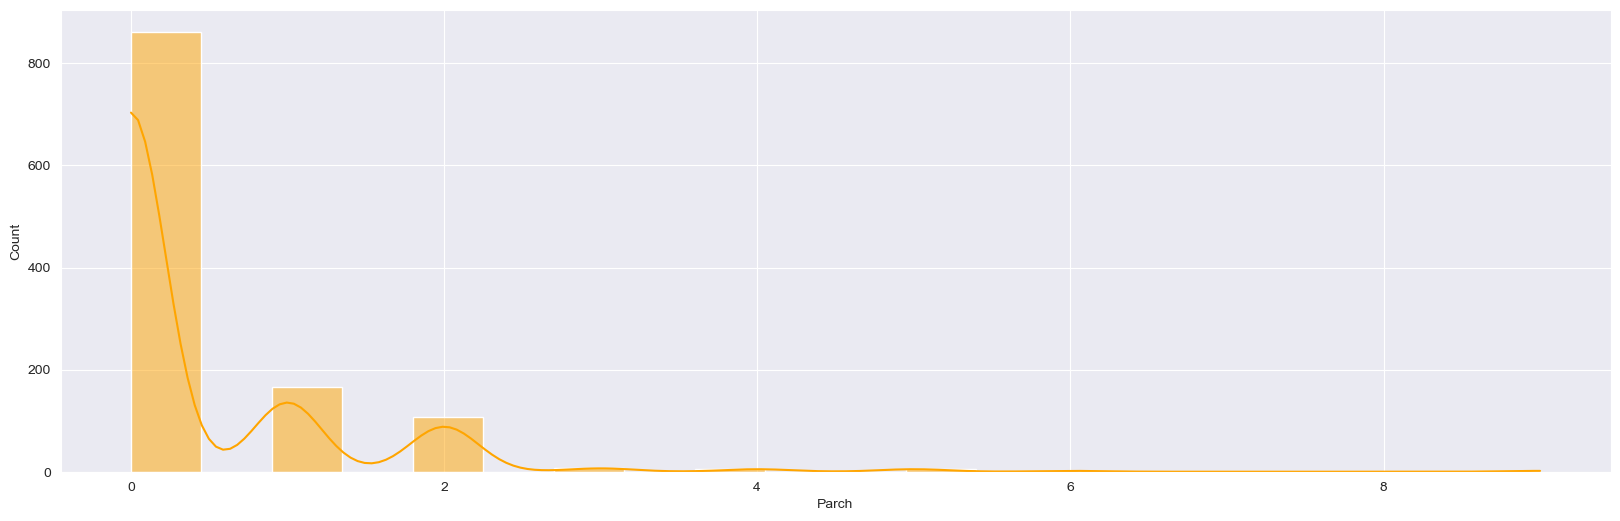

In [374]:
plt.figure(figsize=(20,6))
sns.histplot(titanic_Data['Parch'], bins=20, kde=True, color='orange') 
plt.show()

- At the above plot more of 800 passengers not have parents or children in the titanic

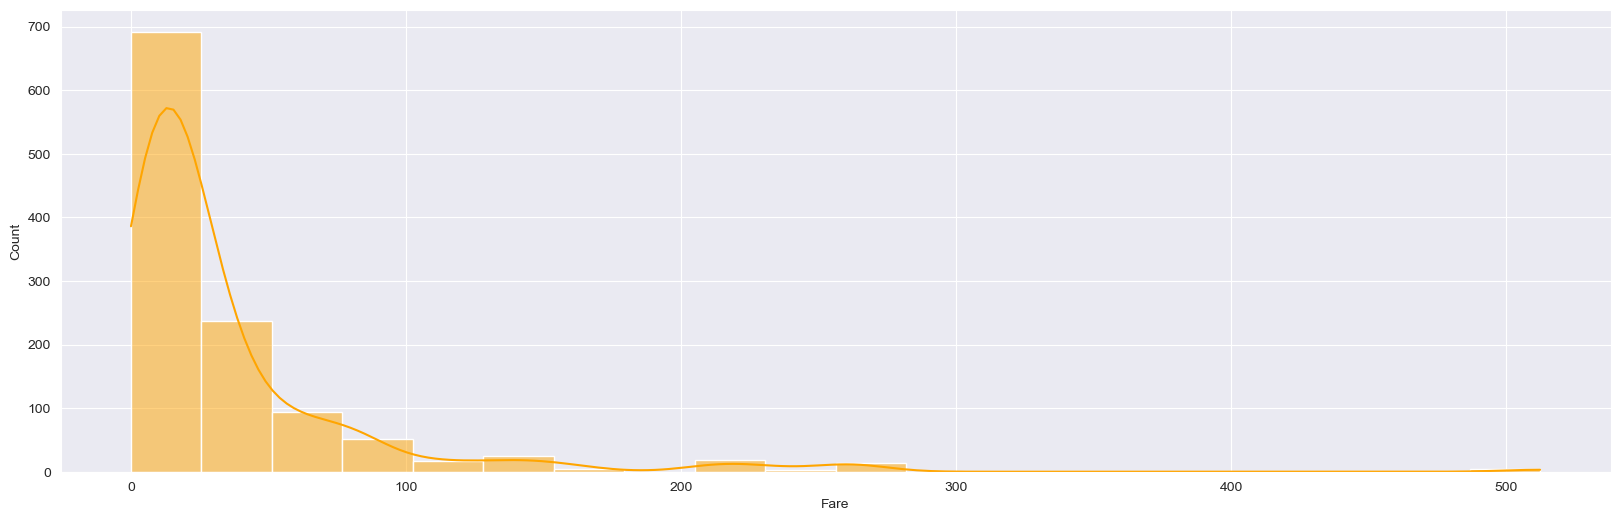

In [375]:
plt.figure(figsize=(20,6))
sns.histplot(titanic_Data['Fare'], bins=20, kde=True, color='orange') 
plt.show()

- Ath the above plot the range of passengers fare in range of the 0 to 100

<Axes: xlabel='Embarked'>

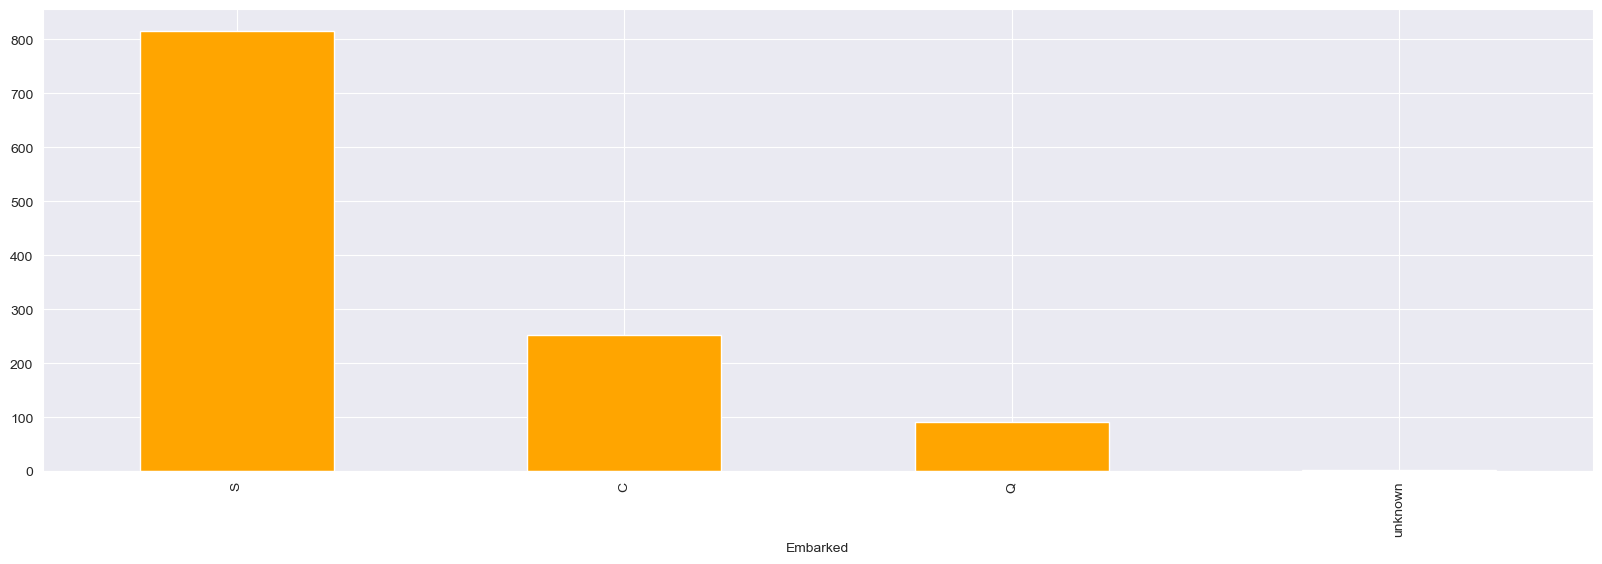

In [376]:
embarical_num=titanic_Data['Embarked'].value_counts(dropna=False)
embarical_num.index = embarical_num.index.where(~embarical_num.index.isna(), 'unknown')
embarical_num.plot(kind='bar',color='orange',figsize=(20,6))

- The number of passengers in the s->Southampton are more than 800 passengers
- The number of passengers in the C ->Cherbourg are less than 300 passengers
- The number of passengers in the  Q-> Queenstown are less than 100 passengers
- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

<Axes: xlabel='Survived'>

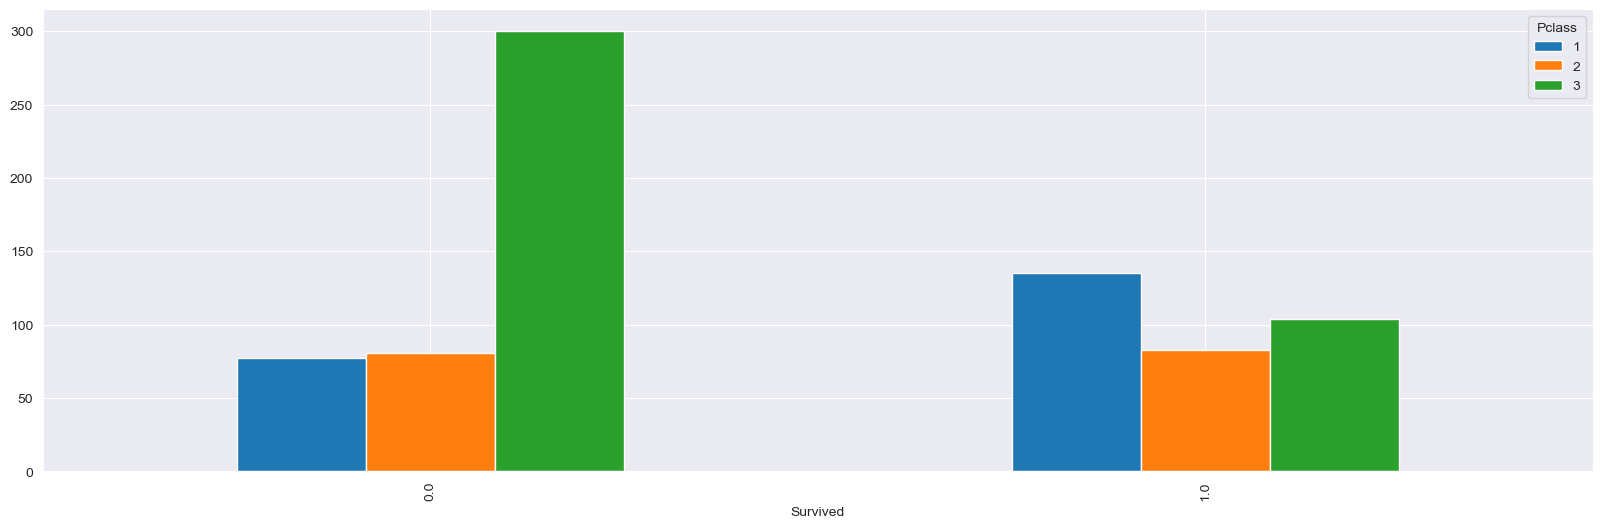

In [377]:
survive_pclass=pd.crosstab(titanic_Data.Survived,titanic_Data.Pclass)
survive_pclass.plot(kind='bar',figsize=(20,6))

- At the above plot the died passengers in the 3 degree =300 passengers
- the died passengers in the 2 degree less than 100 passengers
- the died passengers in the 1 degree less than 80 passengers
- the number of passengers died in the 2 degree and 1 degree are nearst to each other
- the alive passengers in the 1 degree less than 150 passengers
- the alive passengers in the 2 degree less than 100 passengers
- the alive passengers in the 3 degree greater than the passengers in the 2 degree

<Axes: xlabel='Survived'>

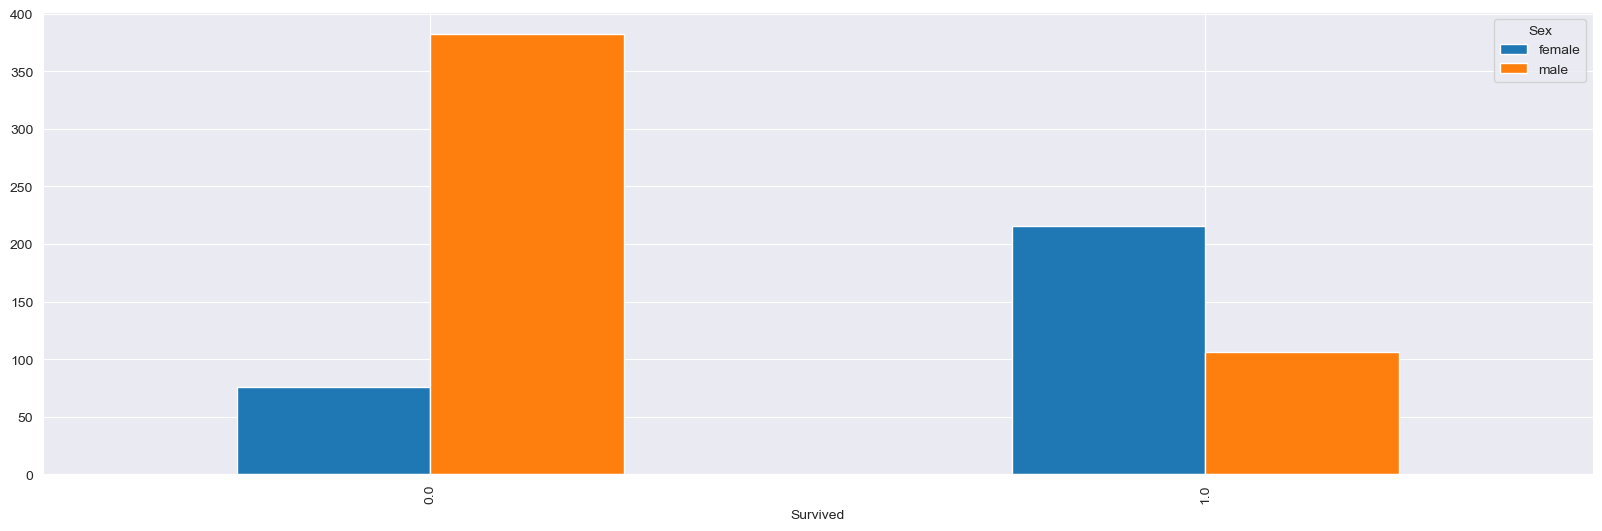

In [378]:
survive_sex=pd.crosstab(titanic_Data.Survived,titanic_Data.Sex)
survive_sex.plot(kind='bar',figsize=(20,6))

- At the above plot the number of passengers died and males are above to 350 and the number of the passengers died and females are less than 100 
- the result of that the most passengers died are males
- the number of the passengers alive and males are less than 150 and the passengers are alive and females less than 150 passengers 
- the resul of this most passengers alive are females

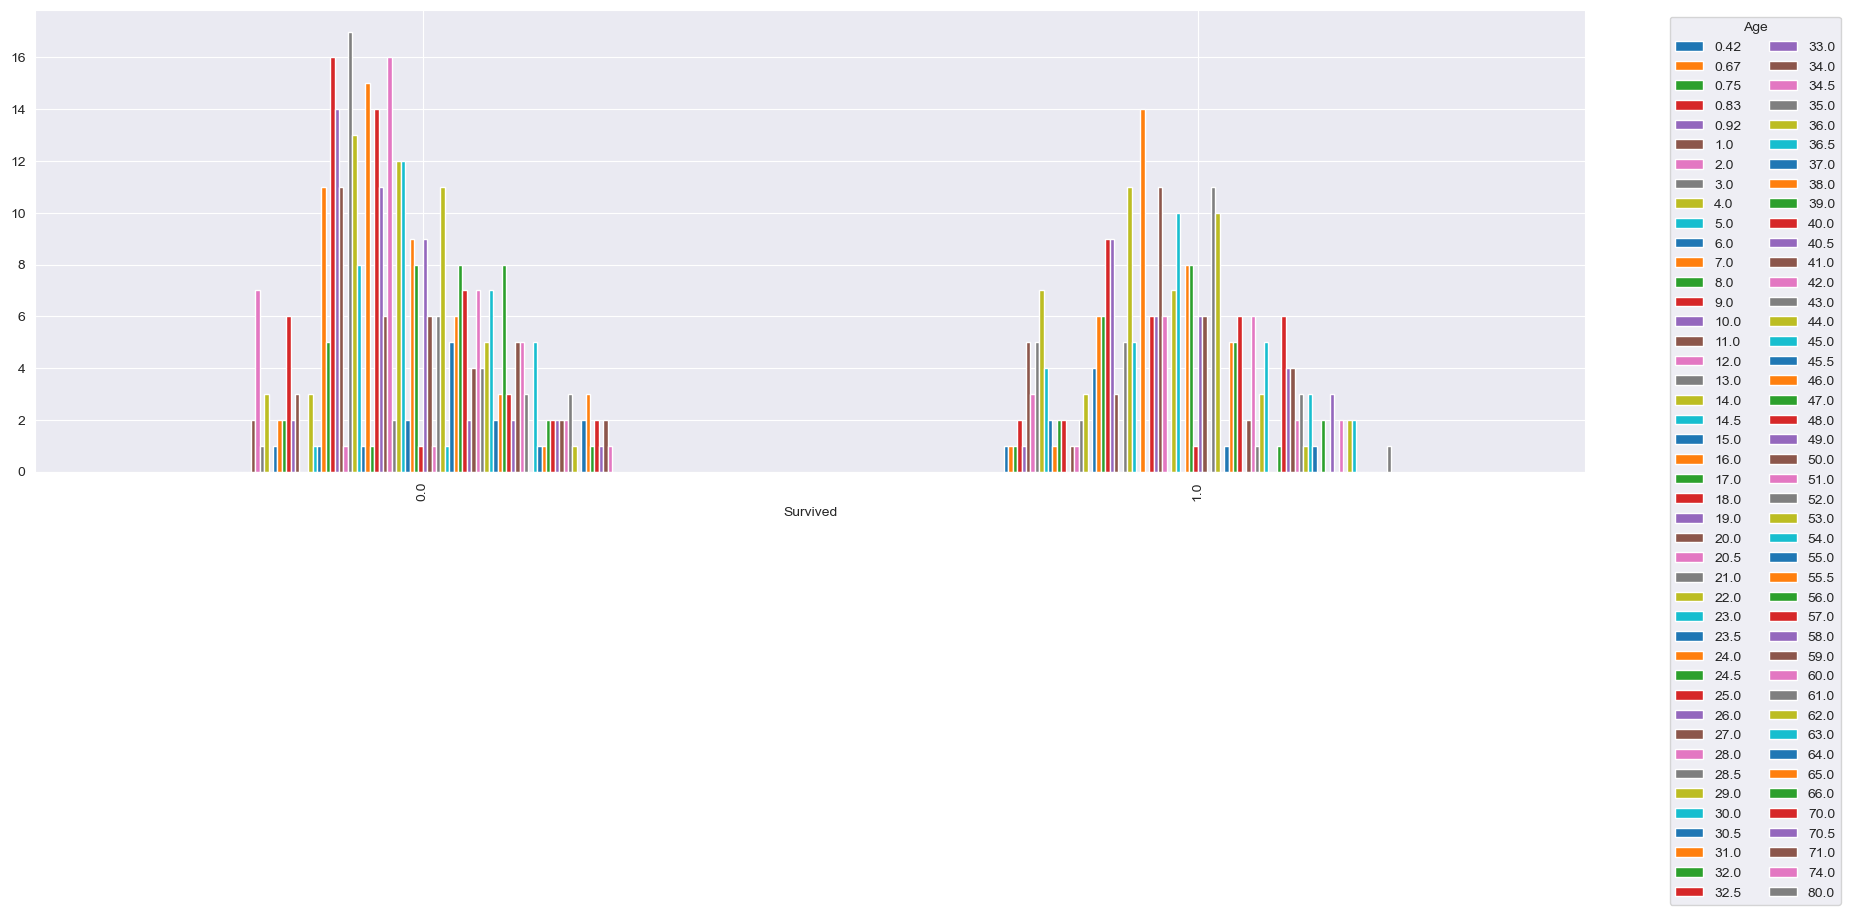

In [379]:
survive_sex=pd.crosstab(titanic_Data.Survived,titanic_Data.Age)
ax=survive_sex.plot(kind='bar',figsize=(20,6))
ax.legend(survive_sex, bbox_to_anchor=(1.05, 1), loc='upper left', title='Age', ncol=2)

the range of the passengers ages died are greater than the range of the passengers ages alive 

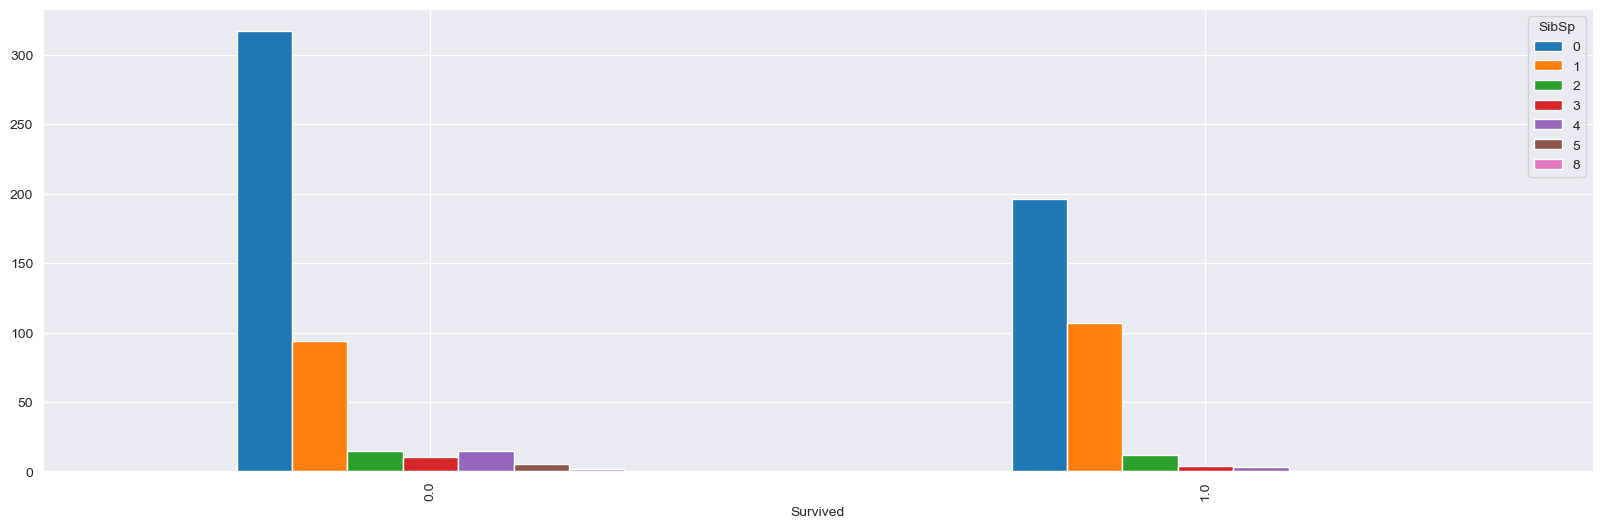

In [380]:
survive_sex=pd.crosstab(titanic_Data.Survived,titanic_Data.SibSp)
ax=survive_sex.plot(kind='bar',figsize=(20,6))

- At the above plot te numbers of passengers died and nor have siblings in the titanic are greater than the number of passengers alive and not have siblings in the titanic
- the number of passengers have one sibling in the titanic died are less than the number of the passengers have one sibling in the titanic and alive 

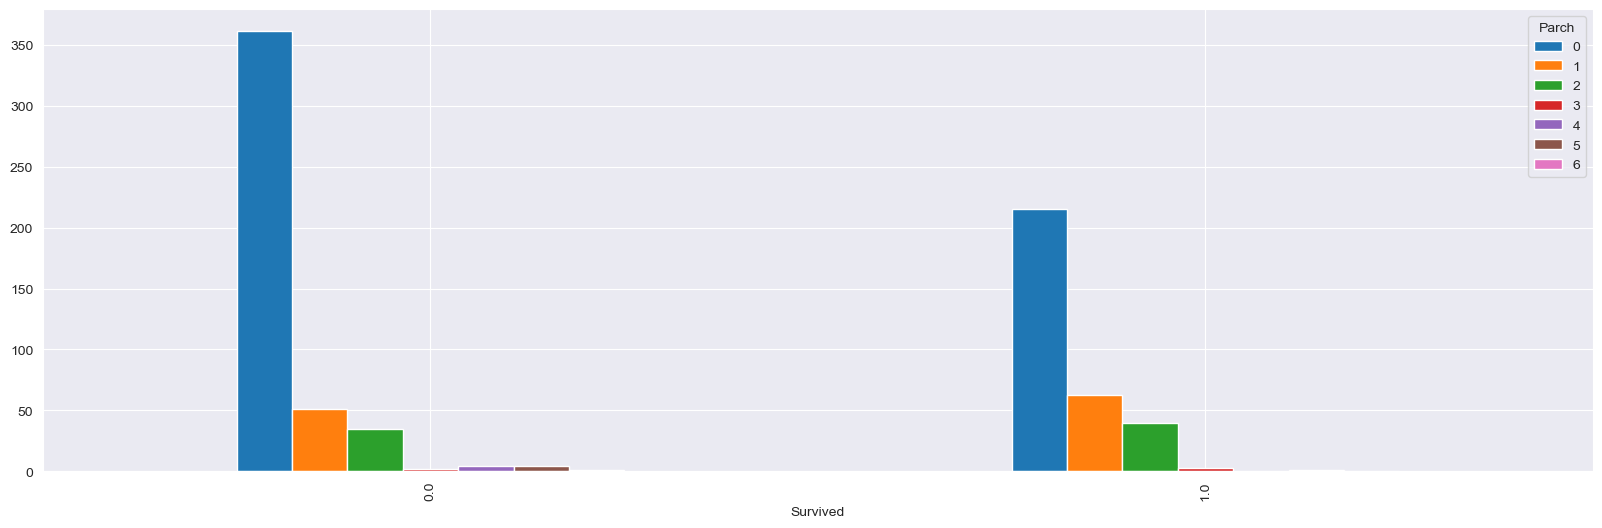

In [381]:
survive_sex=pd.crosstab(titanic_Data.Survived,titanic_Data.Parch)
ax=survive_sex.plot(kind='bar',figsize=(20,6))

- At the above plot te numbers of passengers died and not have parents or children  in the titanic are greater than the number of passengers alive and not have parents or children in the titanic
- the number of passengers have one parent or child in the titanic died are less than the number of the passengers have one parent or child in the titanic and alive 

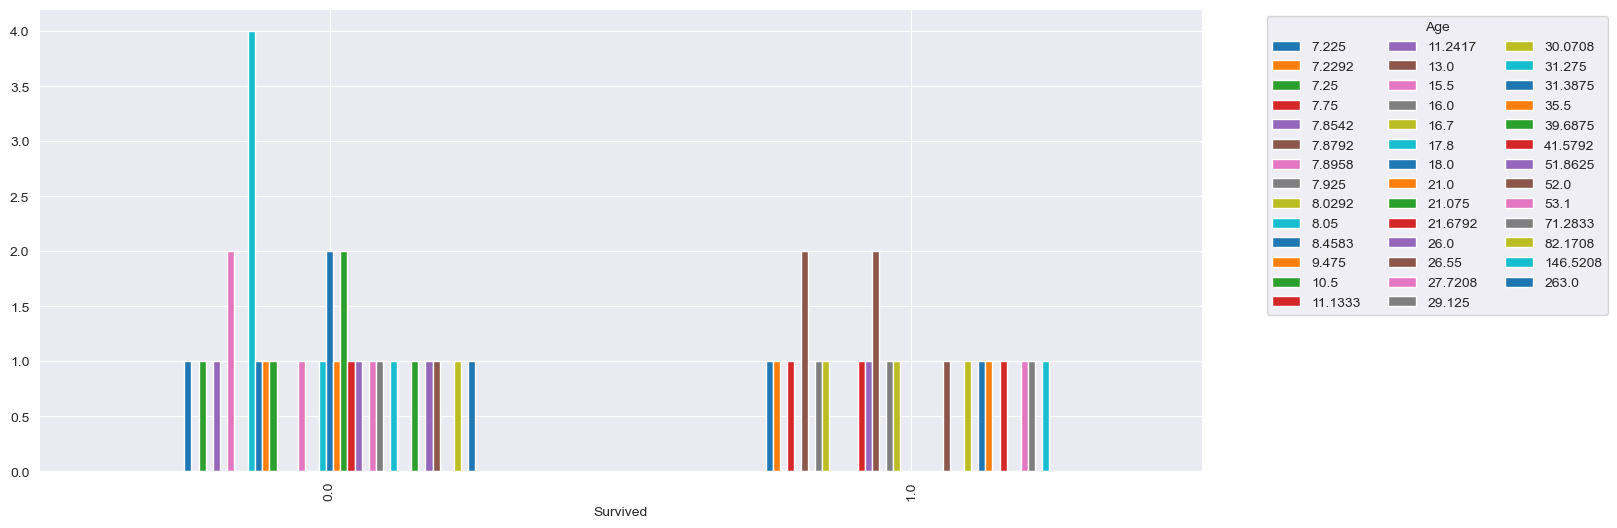

In [382]:
survive_sex=pd.crosstab(titanic_Data.Survived[:50],titanic_Data.Fare[:50])
ax=survive_sex.plot(kind='bar',figsize=(15,6))
ax.legend(survive_sex, bbox_to_anchor=(1.05, 1), loc='upper left', title='Age', ncol=3)

- At the above plot the number of the passengers ticket fare = 8.05 are deid greater than the nuber of the passengers alive

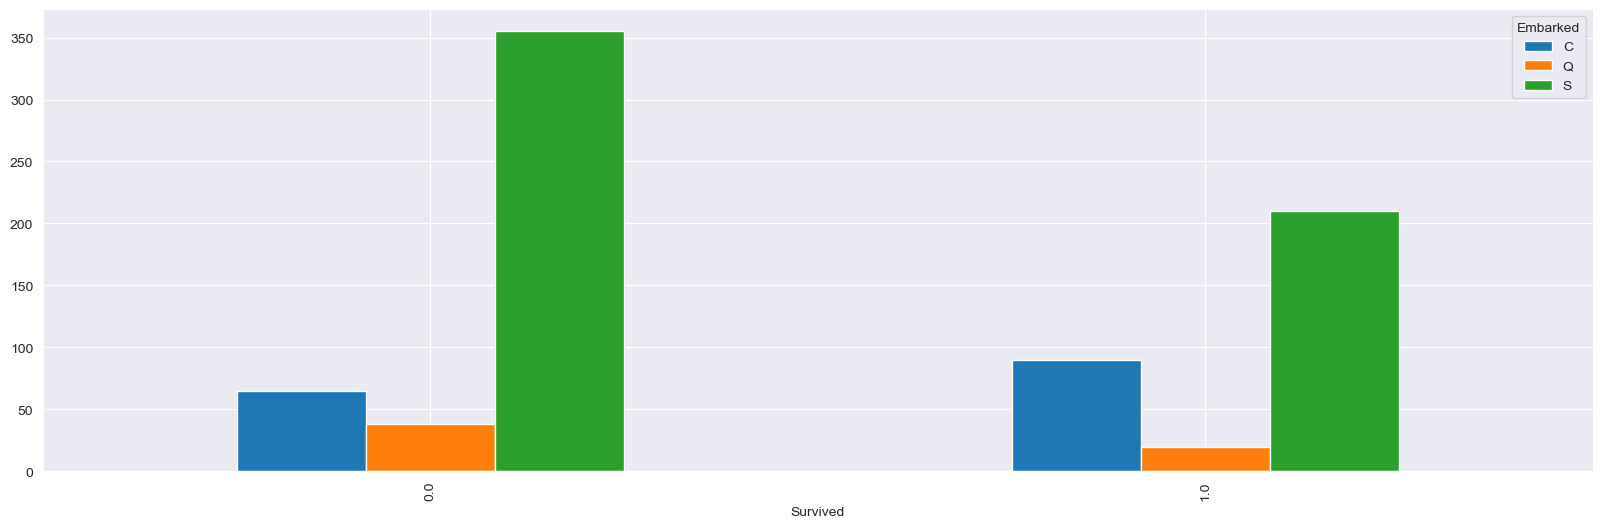

In [383]:
survive_sex=pd.crosstab(titanic_Data.Survived,titanic_Data.Embarked)
ax=survive_sex.plot(kind='bar',figsize=(20,6))

- The number of passengers at the s embarked deid are greater than the all number of passengers died in another  embarked 
- The number of passengers at the s embarked deid are greater than the  number of passengers alive in s  embarked
-  the number of the passengers deid in the embarked are greater than the number of the passengers in embarked alive

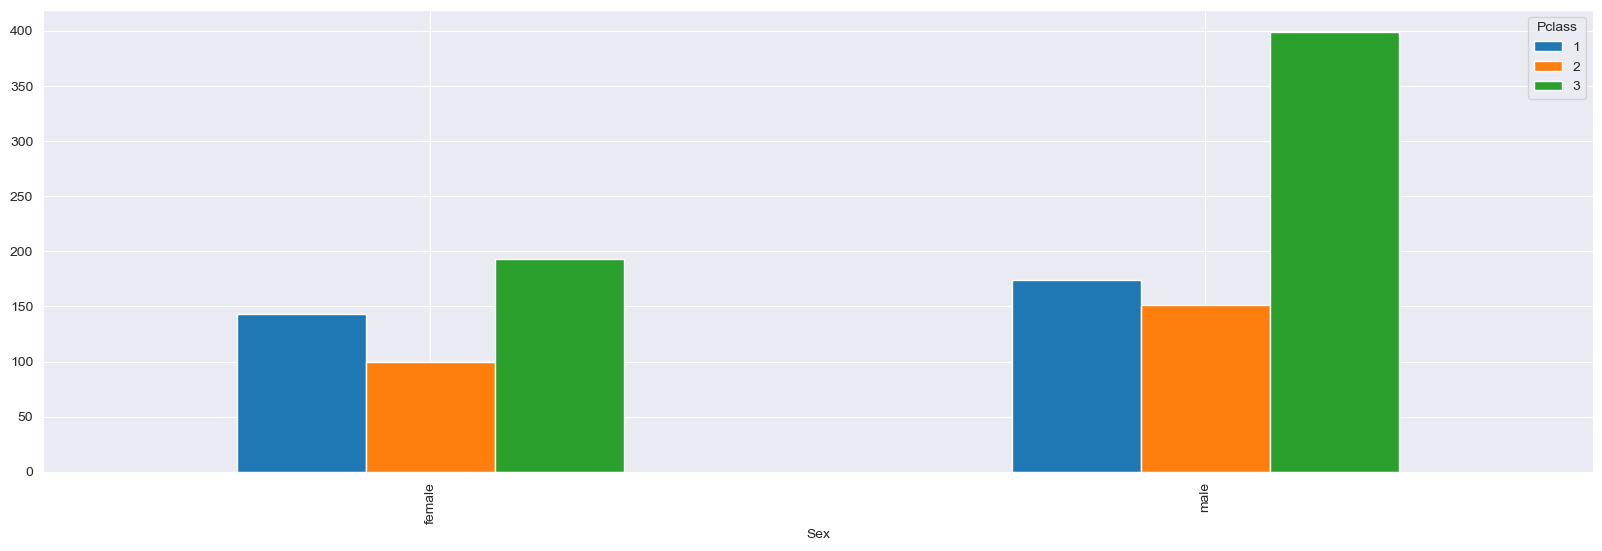

In [384]:
survive_sex=pd.crosstab(titanic_Data.Sex,titanic_Data.Pclass)
ax=survive_sex.plot(kind='bar',figsize=(20,6))

- The plot show the number of the males at the 3 degree are greater than the number of females at the 3 degree so more great

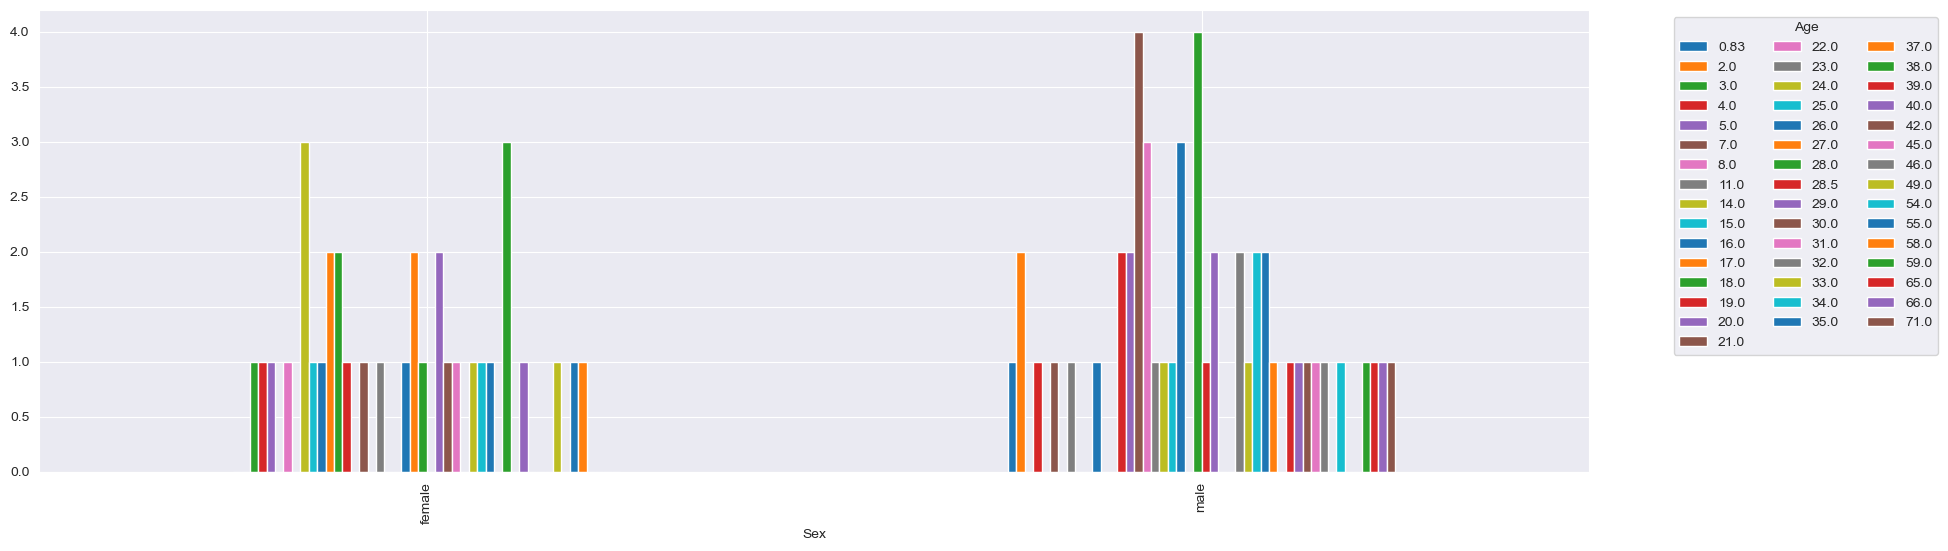

In [385]:
survive_sex=pd.crosstab(titanic_Data.Sex[:100],titanic_Data.Age[:100])
ax=survive_sex.plot(kind='bar',figsize=(20,6))
ax.legend(survive_sex, bbox_to_anchor=(1.05, 1), loc='upper left', title='Age', ncol=3)

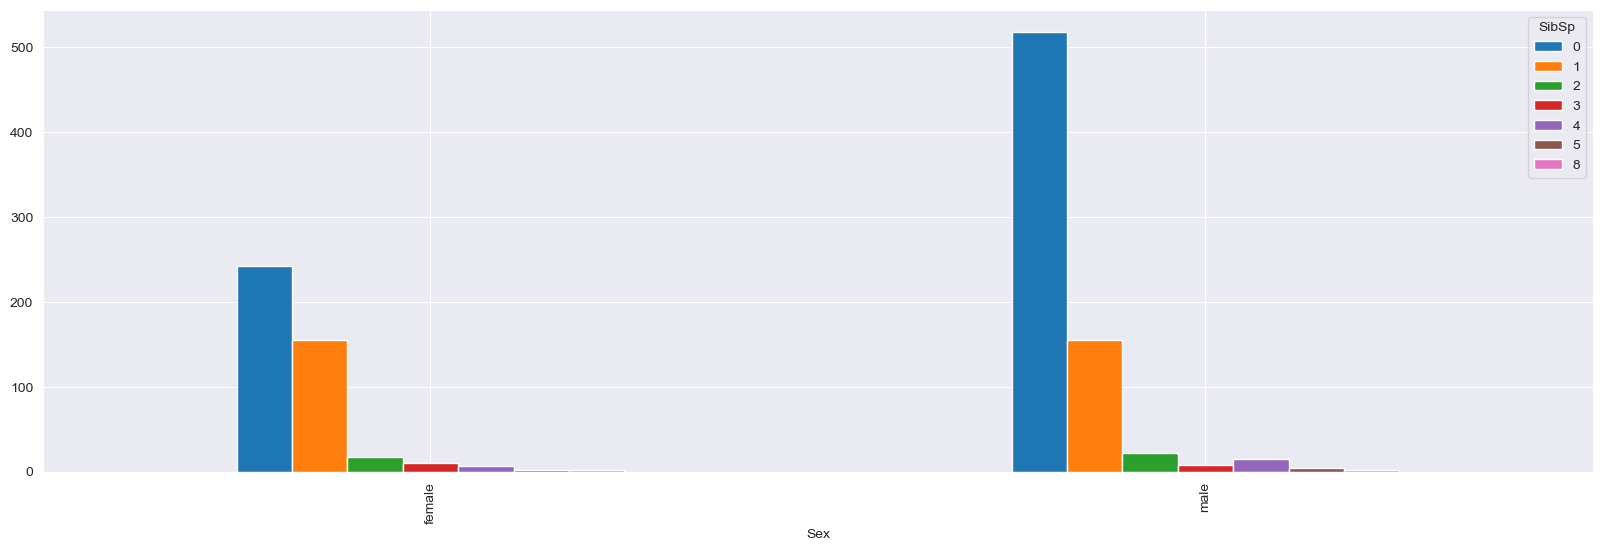

In [386]:
survive_sex=pd.crosstab(titanic_Data.Sex,titanic_Data.SibSp)
ax=survive_sex.plot(kind='bar',figsize=(20,6))

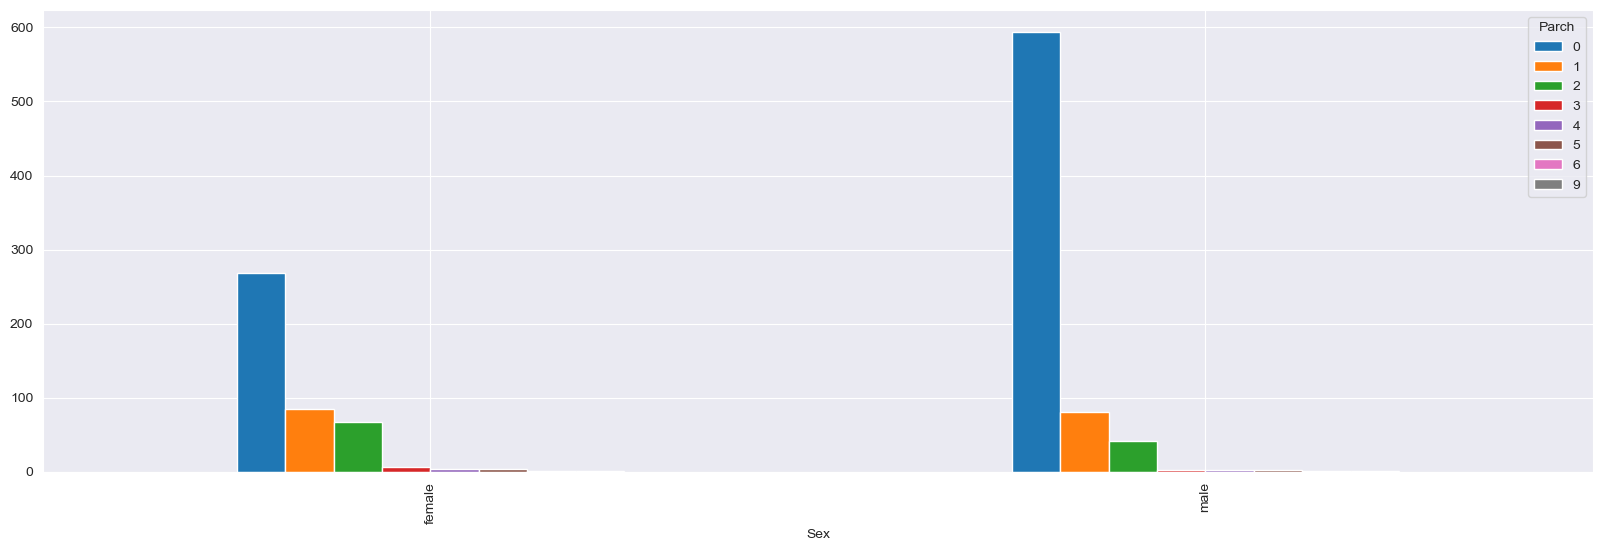

In [387]:
survive_sex=pd.crosstab(titanic_Data.Sex,titanic_Data.Parch)
ax=survive_sex.plot(kind='bar',figsize=(20,6))

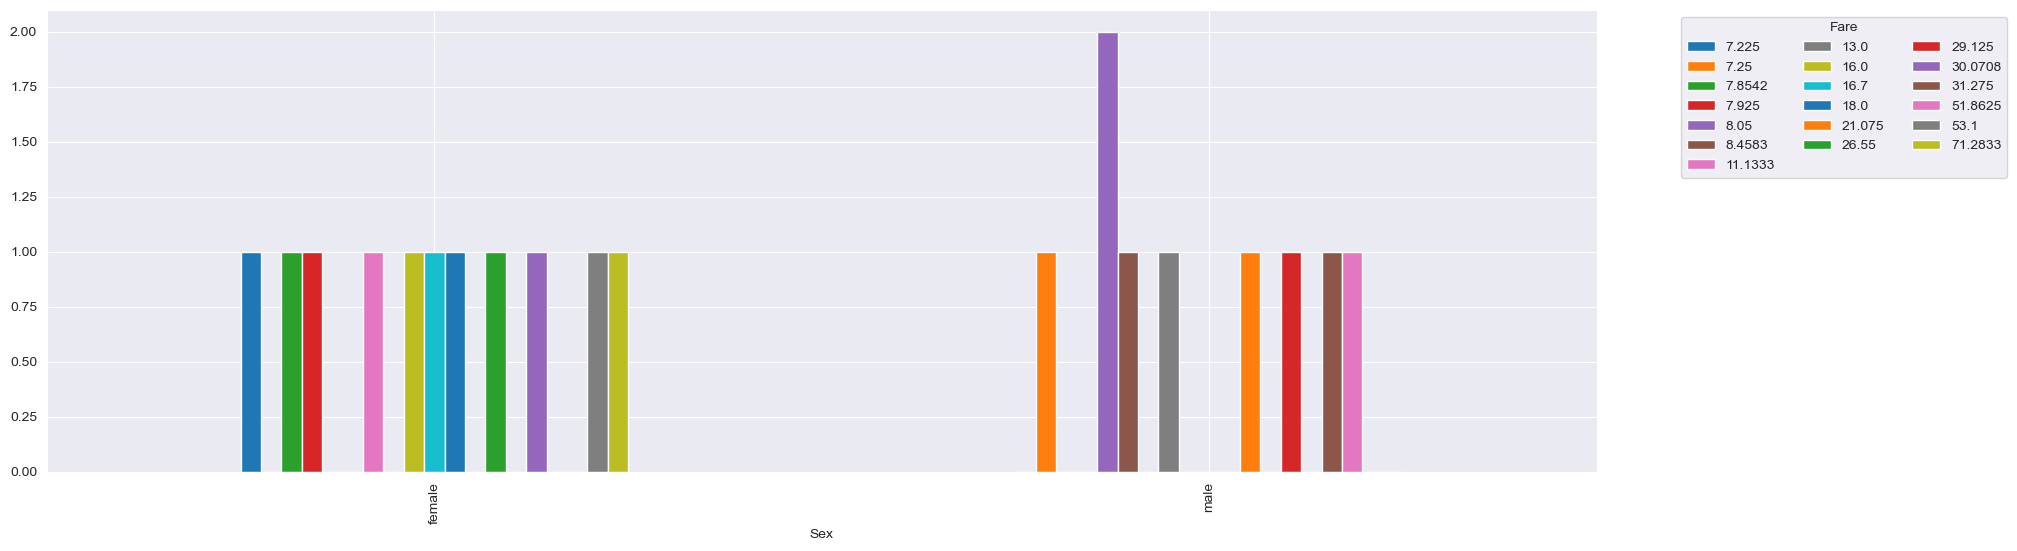

In [388]:
survive_sex=pd.crosstab(titanic_Data.Sex[:20],titanic_Data.Fare[:20])
ax=survive_sex.plot(kind='bar',figsize=(20,6))
ax.legend(survive_sex, bbox_to_anchor=(1.05, 1), loc='upper left', title='Fare', ncol=3)

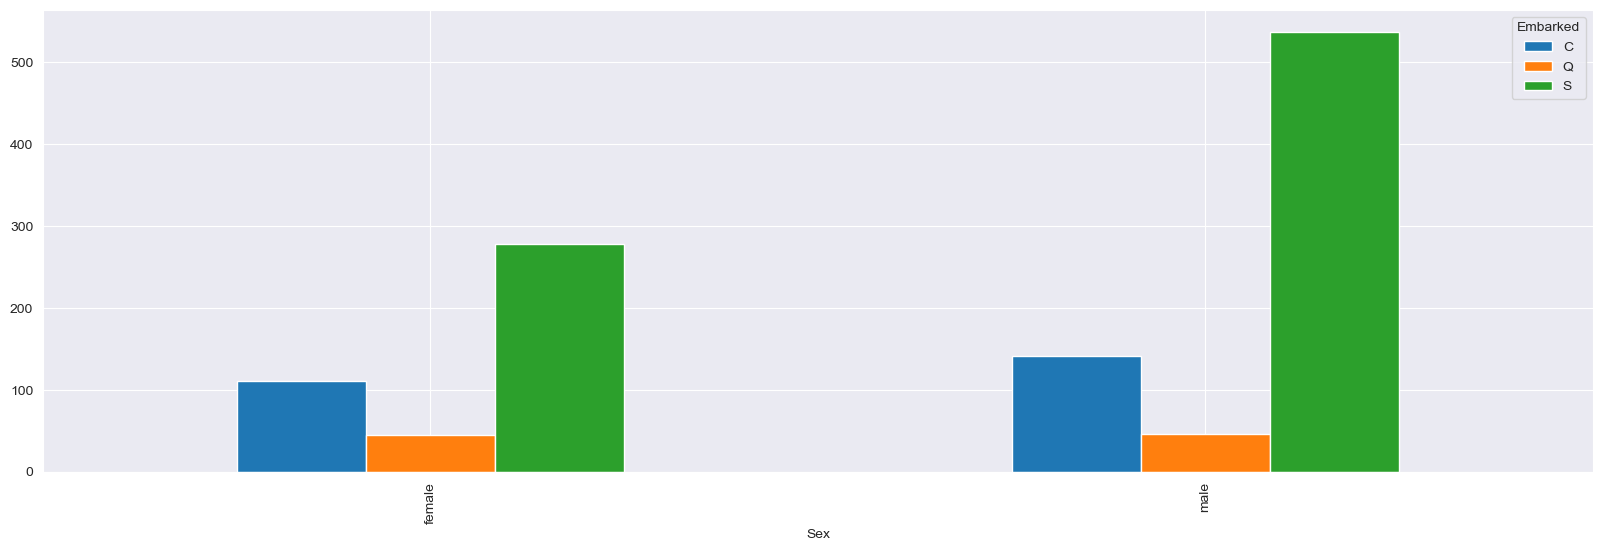

In [389]:
survive_sex=pd.crosstab(titanic_Data.Sex,titanic_Data.Embarked)
ax=survive_sex.plot(kind='bar',figsize=(20,6))

In [390]:
titanic_Data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,780.000000,1160.000000,998.000000,1160.000000,1160.000000,1159.000000
mean,0.412821,2.237069,29.977876,0.512069,0.422414,35.916023
std,0.492657,0.853256,14.607853,0.967920,0.902024,54.210806
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.750000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


- above cell describe the statical info of the numerical data 

In [391]:
relation=titanic_Data.loc[:,['Survived','Pclass','Age','SibSp','Parch','Fare']]
corr=relation.corr()

- show the correlation between thenumerical column

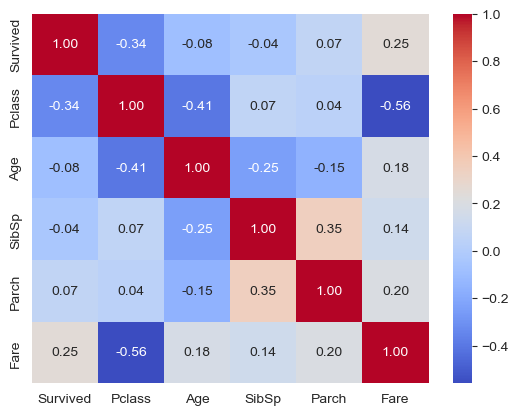

In [392]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

- heat map of the correlation